Titanic dataset is perfect to practice different classification models. In this jupyter notebook, my task will be to 
1. Preprocess data
2. Training
3. Prediction
4. Evaluation
5. Comparison of multiple models
6. Checking if there is any underfitting or overfitting

In [1]:
#import for dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


PREPROCESSING

In [3]:
#First start with getting rid of irrelevant columns
df.drop(['deck','sibsp','parch','alive','who','class','embark_town'],axis=1,inplace=True)

<Axes: >

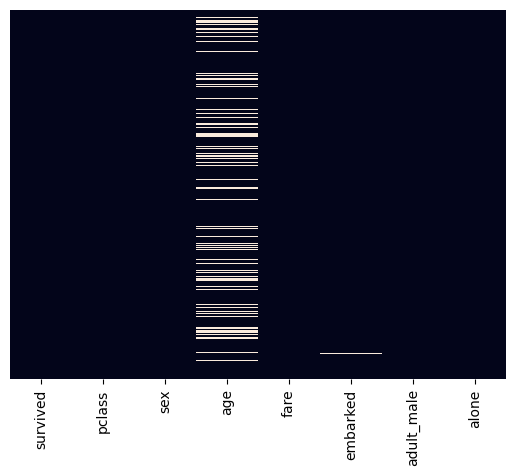

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [7]:
df.isnull().sum()

survived        0
pclass          0
sex             0
age           177
fare            0
embarked        2
adult_male      0
alone           0
dtype: int64

In [ ]:
#exchange the null values of age with the median and embarked with mode 
df['age'].fillna(df['age'].median(),inplace=True)
df['embarked'].fillna(df['embarked'].mode(),inplace=True)

#drop if any missing values left
df.dropna(inplace=True)

<Axes: >

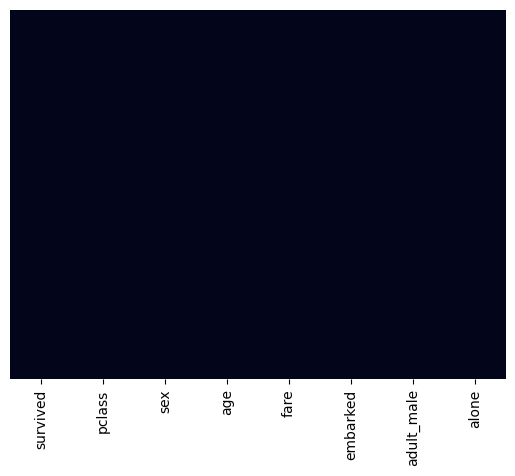

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    889 non-null    int64  
 1   pclass      889 non-null    int64  
 2   sex         889 non-null    object 
 3   age         889 non-null    float64
 4   fare        889 non-null    float64
 5   embarked    889 non-null    object 
 6   adult_male  889 non-null    bool   
 7   alone       889 non-null    bool   
dtypes: bool(2), float64(2), int64(2), object(2)
memory usage: 50.4+ KB


There are some object values that ML models are not big fan of. So, convert them to integers

In [ ]:
#convert to numeric
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [14]:
#convert bool to numeric
df['alone'] = df['alone'].astype(int)
df['adult_male'] = df['adult_male'].astype(int)

In [15]:
df.head()

,survived,pclass,sex,age,fare,embarked,adult_male,alone
0,0,3,0,22.0,7.2500,0,1,0
1,1,1,1,38.0,71.2833,1,0,0
2,1,3,1,26.0,7.9250,0,0,1
3,1,1,1,35.0,53.1000,0,0,0
4,0,3,0,35.0,8.0500,0,1,1


Now the dataset looks good. We can visualize the data using seaborn to make subplots and check the relations. it can also help us to determine which ML model to use for classification. 

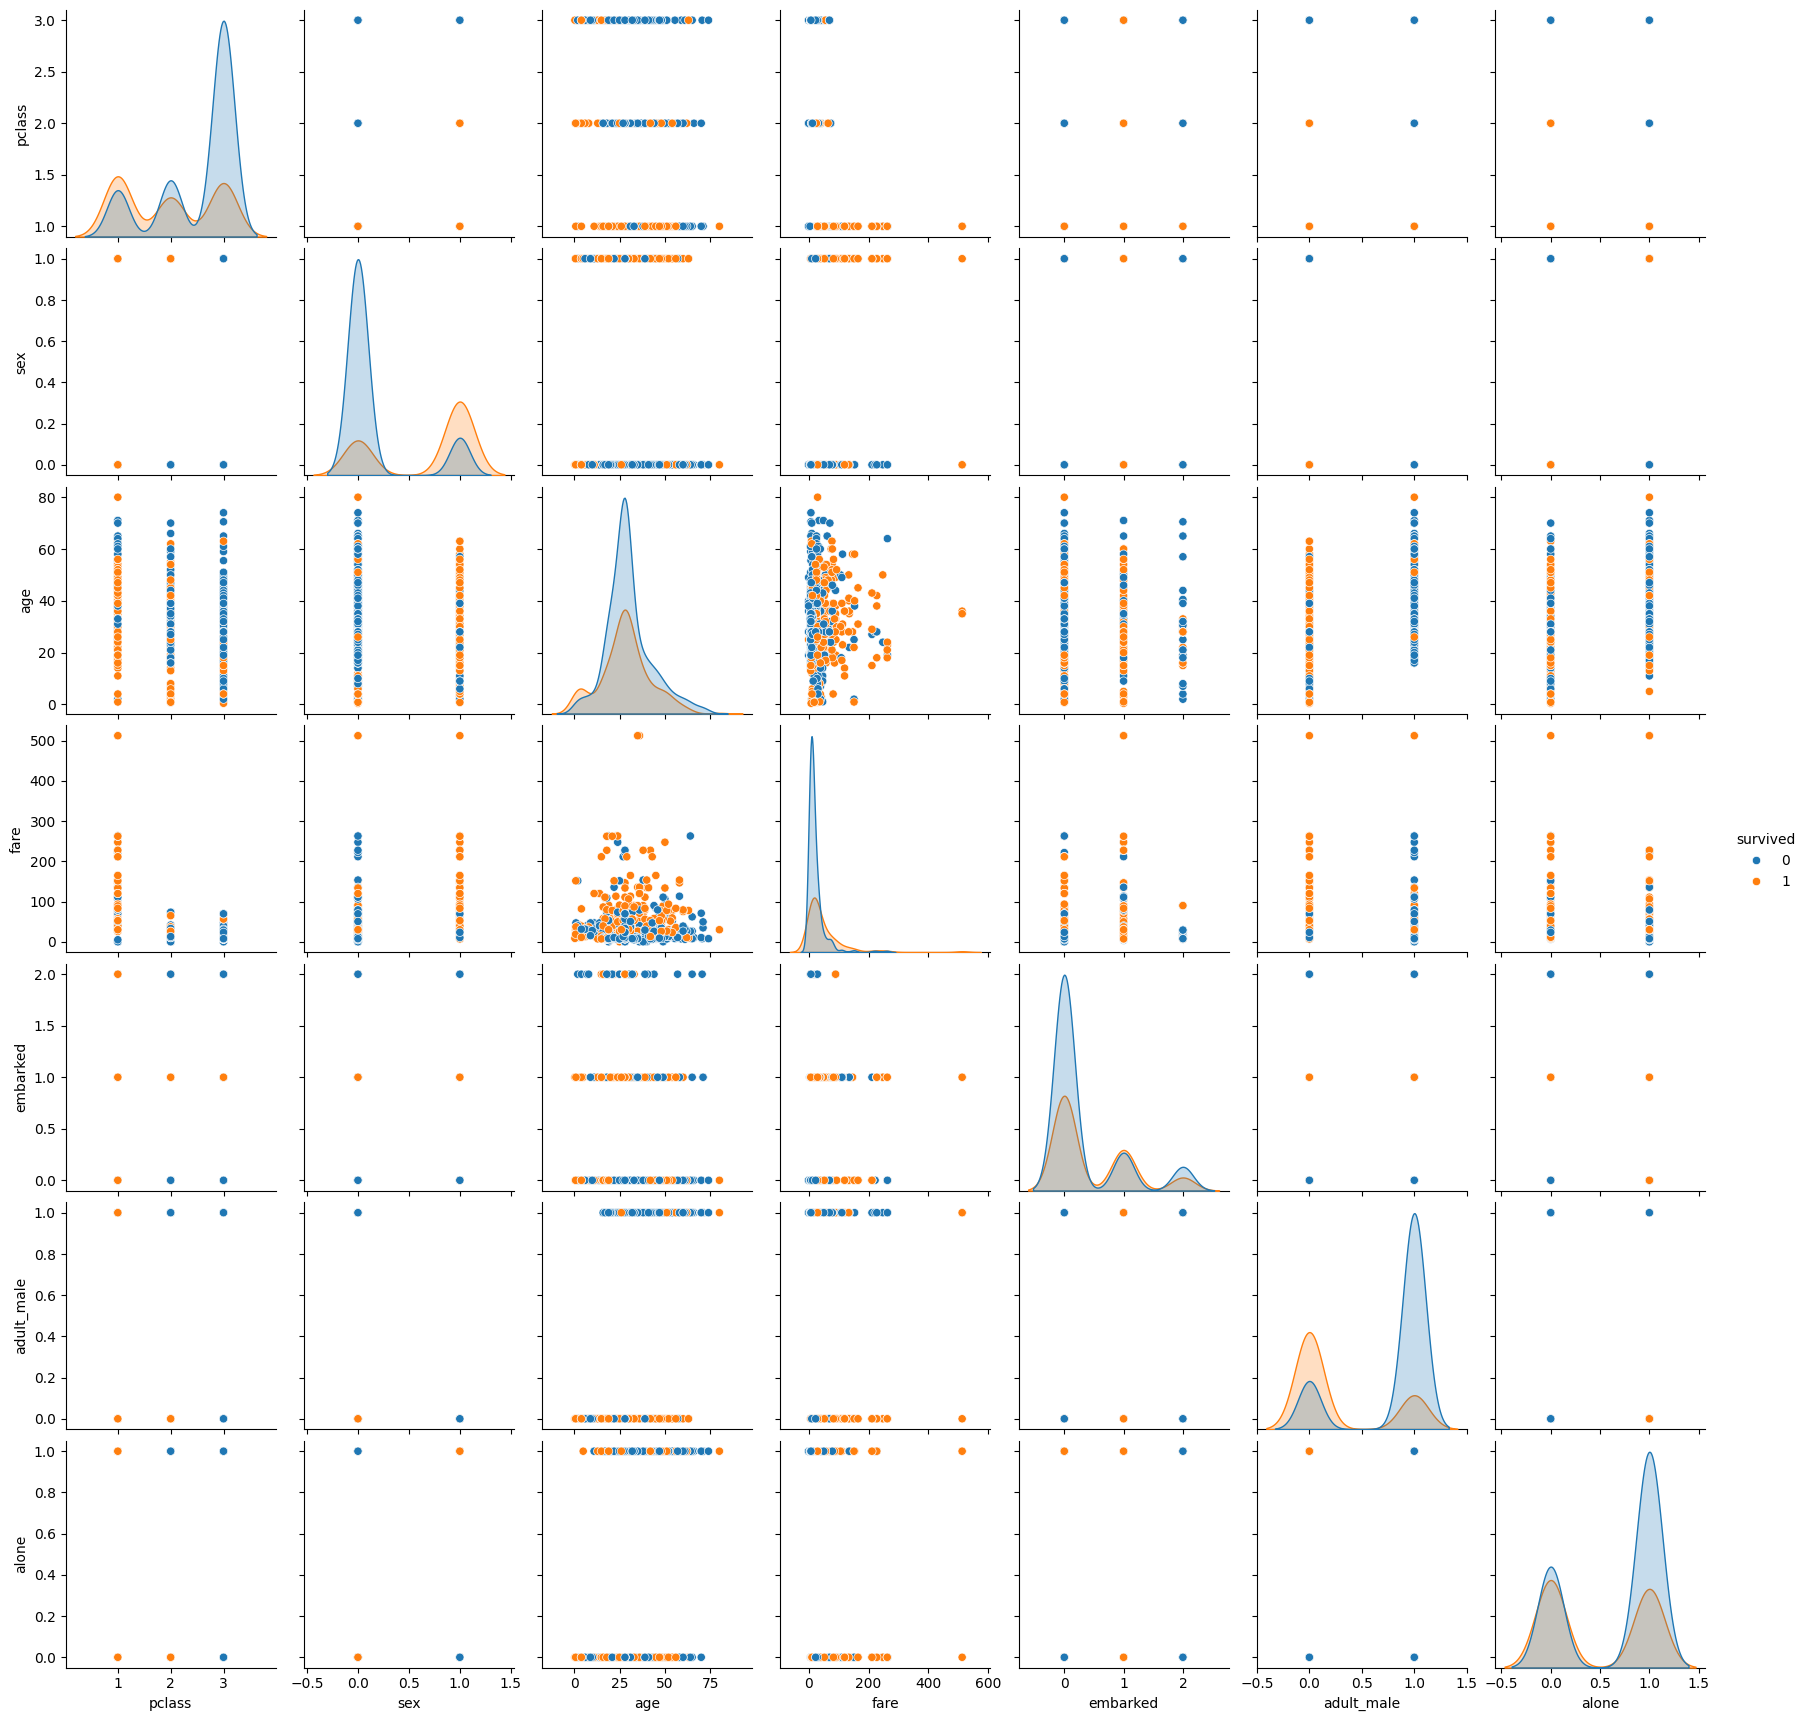

In [16]:
sns.pairplot(df,hue='survived')

As you can see a lot of values overlap so something like logistic regression would not be good for it. KNN could potentially do very well. Let's test out the accuracy of different models.

TRAINING

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [18]:
#define features and target

X = df.drop(['survived'], axis=1) #feature
y = df['survived'] #target

In [19]:
#feature scaling - It is a method used to normalize the range of independent variables or features of data.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
#split the dataset in 80:20 ratio for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

WE USE DIFFERENT MODELS TO TRAIN IT (just for practice and checking which one is best)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [22]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),    #Logistic regression
    'Random Forest': RandomForestClassifier(n_estimators=100),  #Random Forest
    'Support Vector Machine': SVC(probability=True),            #Support Vector Machine
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)  #K-Nearest Neighbours
}


results = {}


Logistic Regression - Accuracy: 0.8034, ROC AUC: 0.8648
Confusion Matrix:
[[89 20]
 [15 54]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       109
           1       0.73      0.78      0.76        69

    accuracy                           0.80       178
   macro avg       0.79      0.80      0.80       178
weighted avg       0.81      0.80      0.80       178


Random Forest - Accuracy: 0.7921, ROC AUC: 0.8615
Confusion Matrix:
[[88 21]
 [16 53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       109
           1       0.72      0.77      0.74        69

    accuracy                           0.79       178
   macro avg       0.78      0.79      0.78       178
weighted avg       0.80      0.79      0.79       178


Support Vector Machine - Accuracy: 0.8202, ROC AUC: 0.8442
Confusion Matrix:
[[99 10]
 [22 47]]
Classification Report

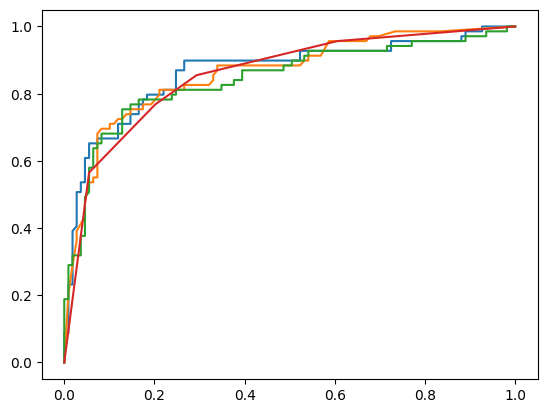

In [23]:
#Now we train it
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    acc = model.score(X_test, y_test)
    auc = roc_auc_score(y_test, y_prob)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"\n{name} - Accuracy: {acc:.4f}, ROC AUC: {auc:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    #Save results
    results[name] = {
        'model': model,
        'auc': auc,
        'acc': acc,
        'cm': cm,
        'y_pred': y_pred,
        'y_prob': y_prob
    }

    #Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')


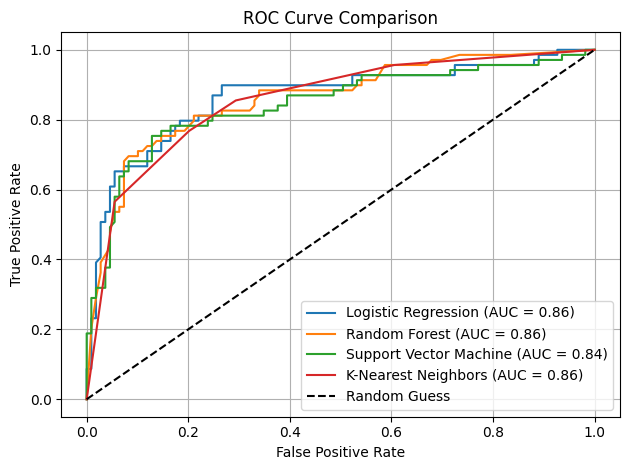

In [ ]:
#FINAL ROC PLOT

for name, res in results.items():
    fpr, tpr, thresholds = roc_curve(y_test, res['y_prob'])
    auc_score = res['auc']
    
    # Plot line
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')


plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()

ACCURACY - 
1. Logistic Regression - Accuracy: 0.8034, ROC AUC: 0.8648
2. Random Forest - Accuracy: 0.7921, ROC AUC: 0.8615
3. Support Vector Machine - Accuracy: 0.8202, ROC AUC: 0.8442
4. K-Nearest Neighbors - Accuracy: 0.7865, ROC AUC: 0.8563

LET'S DO CROSS-VALIDATION

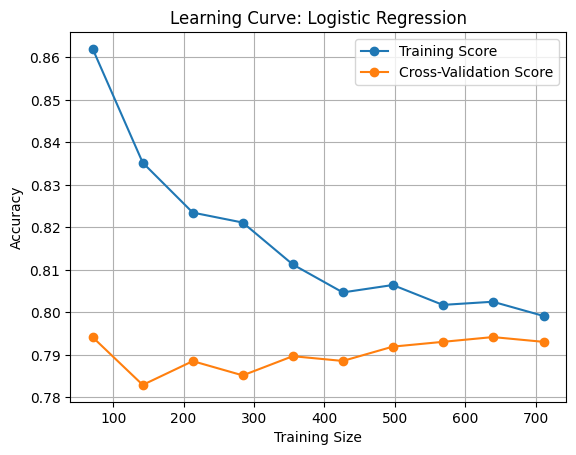

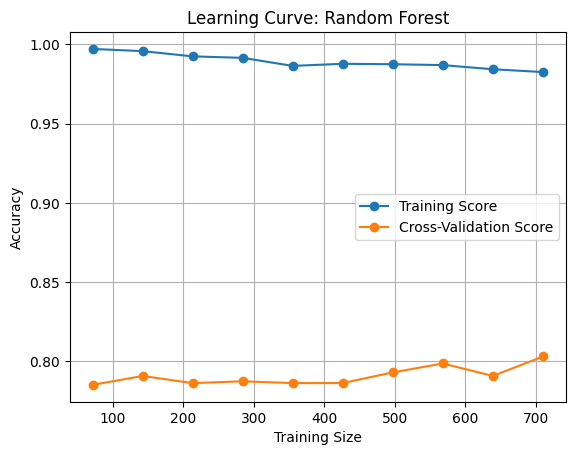

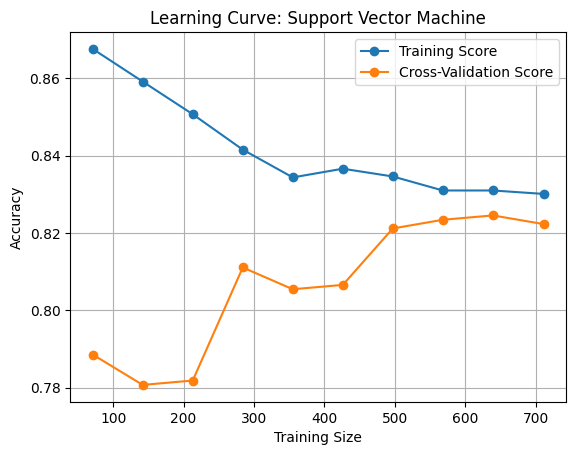

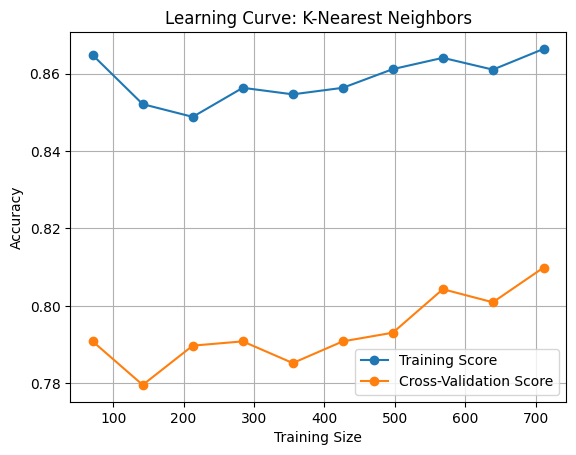

In [28]:
def plot_learning_curve(model, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_scaled, y, cv=5, scoring='accuracy', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=42)

    train_scores_mean = train_scores.mean(axis=1)
    test_scores_mean = test_scores.mean(axis=1)

    plt.figure()
    plt.plot(train_sizes, train_scores_mean, 'o-', label='Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', label='Cross-Validation Score')
    plt.title(f'Learning Curve: {title}')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

# Plot learning curves for each model
for name, res in results.items():
    plot_learning_curve(res['model'], name)

FROM THIS GRAPH WE HAVE LEARNED THAT -
1. Logistic Regression - low training score and low CV score which means it is **UNDERFITTING**
2. Random Forest - Very high training score and lower CV score which means it is **OVERFITTING**
3. SVM - Balanced training score and balanced CV score which means it is the **BEST** generalization *so far*
4. KNN - High training score and lower CV score means it is **OVERFITTING**

- Since KNN performed the best apart from SVM, we can try making it better by changing the *k* value and compare which performs best.

In [38]:
# Range of k values to test
k_range = range(1, 16)
cv_scores = []

In [39]:
# Evaluate each k using 5-fold cross-validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
    print(f"k={k} | CV Accuracy: {scores.mean():.4f}")

k=1 | CV Accuracy: 0.7514
k=2 | CV Accuracy: 0.7897
k=3 | CV Accuracy: 0.7897
k=4 | CV Accuracy: 0.7998
k=5 | CV Accuracy: 0.8099
k=6 | CV Accuracy: 0.7998
k=7 | CV Accuracy: 0.7987
k=8 | CV Accuracy: 0.8020
k=9 | CV Accuracy: 0.7998
k=10 | CV Accuracy: 0.8020
k=11 | CV Accuracy: 0.8054
k=12 | CV Accuracy: 0.8077
k=13 | CV Accuracy: 0.7987
k=14 | CV Accuracy: 0.8099
k=15 | CV Accuracy: 0.8021


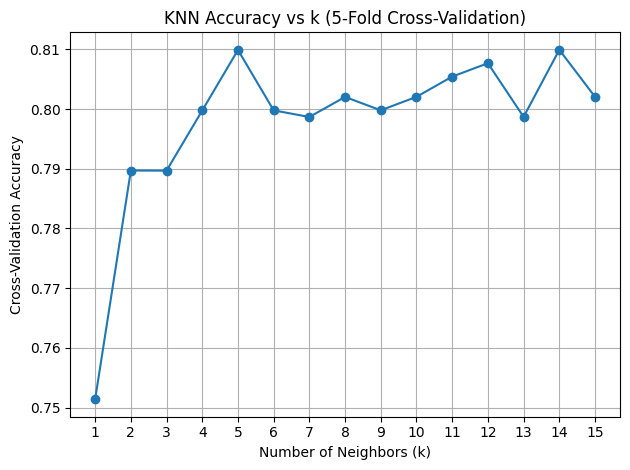

Best k: 14 with CV Accuracy: 0.8099


In [46]:
# Plotting the results

plt.plot(k_range, cv_scores, marker='o')
plt.xticks(k_range)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN Accuracy vs k (5-Fold Cross-Validation)')
plt.grid()
plt.tight_layout()
plt.show()

# Best k
best_k = k_range[cv_scores.index(max(cv_scores))]
print(f"Best k: {best_k} with CV Accuracy: {max(cv_scores):.4f}")

In [43]:
# Final KNN model with optimal k
best_k = 14
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)

# Evaluate on test set
y_pred_final = knn_final.predict(X_test)
y_prob_final = knn_final.predict_proba(X_test)[:, 1]

# Final metrics
final_acc = knn_final.score(X_test, y_test)
final_auc = roc_auc_score(y_test, y_prob_final)
final_cm = confusion_matrix(y_test, y_pred_final)

print(f"\nFinal KNN (k={best_k}) - Test Accuracy: {final_acc:.4f}, ROC AUC: {final_auc:.4f}")
print("Confusion Matrix:")
print(final_cm)
print("Classification Report:")
print(classification_report(y_test, y_pred_final))



Final KNN (k=14) - Test Accuracy: 0.8202, ROC AUC: 0.8632
Confusion Matrix:
[[98 11]
 [21 48]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       109
           1       0.81      0.70      0.75        69

    accuracy                           0.82       178
   macro avg       0.82      0.80      0.80       178
weighted avg       0.82      0.82      0.82       178



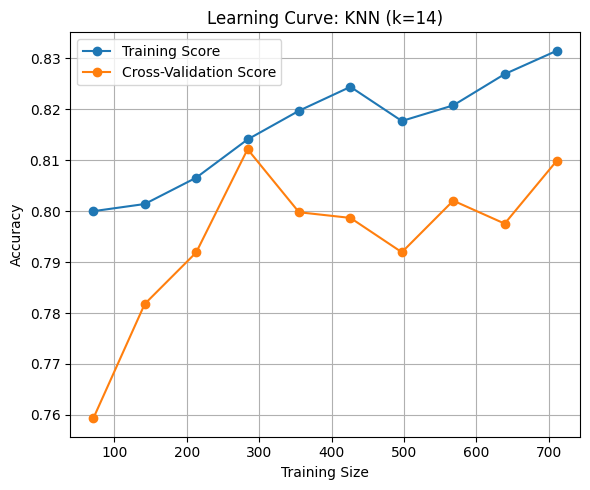

In [45]:
# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    knn_final, X_scaled, y, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

# Compute mean scores
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

# Plot the learning curve
plt.figure(figsize=(6, 5))
plt.plot(train_sizes, train_mean, 'o-', label='Training Score')
plt.plot(train_sizes, test_mean, 'o-', label='Cross-Validation Score')
plt.title(f'Learning Curve: KNN (k={best_k})')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.tight_layout()
plt.show()

SVM STILL SLIGHTLY EDGES IT OUT AND WORKED BETTER 